# This notebook outputs sample images from the hubble catalog in ranges of redshift, surface brightness, and p_features. Each image displays the weighted and debiased p_features values so that the effects of the debiasing can be visually inspected. 


In [1]:
%matplotlib inline
from PIL import Image
import urllib, cStringIO
from astropy.table import Table
import numpy as np
from matplotlib import rcParams
from matplotlib import pyplot as plt

import matplotlib.gridspec as gridspec
rcParams['text.usetex']=True
from random import shuffle
import os

In [2]:
#hubble data
data=Table.read('/Users/willettk/Dropbox/gzhubble/gz_hubble_catalog_12_4_2015.fits')

In [3]:
cats=list(set(data['Correctable_Category']))
correctable=cats[0]

In [4]:
def get_image_from_file(name):
    
    img = Image.open('/Volumes/REISEPASS/gzh/jpg/{0}.jpg'.format(name))
    return img

In [ ]:
def galaxies_list(zl,zh,mul,muh,pl,ph):
    #get list of galaxies within certain ranges of z, mu and p_features 
    these_data=(data['Z']>=zl) & (data['Z'] < zh) & (data['MU_HI']>=mul) & (data['MU_HI'] < muh) & (data['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'] >=pl) & (data['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'] < ph) & (data['Correctable_Category']==correctable)
    return data[these_data]

In [ ]:
# Elliptical galaxies

gs=gridspec.GridSpec(4,4)
gs.update(wspace=0.01)
gs.update(hspace=0.01)

#define upper and lower limits of z, mu, and p_features to look at:
zl = 0.3
zh = 0.5
mul = 17
muh = 20
pl = 0.0
ph = 0.2
 
these_data=galaxies_list(zl,zh,mul,muh,pl,ph)

# check to see if files are present

for gal in these_data:
    if not os.path.exists('/Volumes/REISEPASS/gzh/jpg/{0}.jpg'.format(gal['OBJNO_1'])):
        these_data = these_data[these_data['OBJNO_1'] != gal['OBJNO_1']]
        
if len(these_data) < 20:
    print 'try new values'

#shuffle which galaxies get displayed     
n_list=np.linspace(0,len(these_data)-1,len(these_data))
shuffle(n_list)


f=plt.figure(figsize=(30,30))
n=0
for i in range (0,4):
    for j in range(0,4):
        ax=plt.subplot(gs[i,j])
        #while 'h' not in these_data[int(n_list[n])]['OBJNO_1']:
        n+=1
        gal = these_data[int(n_list[n])] # random galaxy from big list
        plt.imshow(get_image_from_file(gal['OBJNO_1']))
        plt.tick_params(labelbottom='off',labelleft='off')
        ax.annotate('z: %s\n$\mu: %s$'%(round(gal['Z'],2),round(gal['MU_HI'],2)),fontsize=40,xy=(0,1),
            xycoords='axes fraction',verticalalignment='top',color='white')
        ax.annotate('%s'%gal['OBJNO_1'],fontsize=30,xy=(1,1),
            xycoords='axes fraction',verticalalignment='top',horizontalalignment='right',color='white')
        ax.annotate('$\mathrm{p_{features}: %s}$\n$\mathrm{p_{features,debiased}: %s}$'%(round(gal['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'],2),round(gal['t01_smooth_or_features_a02_features_or_disk_debiased_fraction'],2)),fontsize=45,xy=(0,0),
            xycoords='axes fraction',color='white')
        n+=1
        
plt.savefig('/Users/willettk/Astronomy/meetings/florida2016/images_ellipticals.pdf')
#f.text(.5,.92,'$%s < z < %s$\n$%s > \mu < %s$\n$%s > p_{features} < %s$'%(zl,zh,mul,muh,pl,ph), fontsize=40,ha='center');

In [ ]:
# Two-armed spirals

gs=gridspec.GridSpec(4,4)
gs.update(wspace=0.01)
gs.update(hspace=0.01)

#define upper and lower limits of z, mu, and p_features to look at:
zl = 0.0
zh = 2.0
mul = 17
muh = 20
pl = 0.0
ph = 0.2
 
#get list of galaxies within certain ranges of z, mu and p_features 
data_inds = (data['Z']>=zl) & (data['Z'] < zh) &  (data['MU_HI']>=mul) & (data['MU_HI'] < muh) & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction'] >=0.5) & (data['t02_edgeon_a02_no_weighted_fraction'] >= 0.5) & (data['t12_clumpy_a02_no_weighted_fraction'] >= 0.5) & (data['t04_spiral_a01_spiral_weighted_fraction'] >= 0.5) & (data['t11_arms_number_a02_2_weighted_fraction'] >= 0.75) & (data['t11_arms_number_a02_2_weight'] >= 10) & (data['Correctable_Category']==correctable)

these_data = data[data_inds]

# check to see if files are present

for gal in these_data:
    if not os.path.exists('/Volumes/REISEPASS/gzh/jpg/{0}.jpg'.format(gal['OBJNO_1'])):
        these_data = these_data[these_data['OBJNO_1'] != gal['OBJNO_1']]
        
if len(these_data) < 20:
    print 'try new values - only {0} images'.format(len(these_data))
else:
    print len(these_data)

#shuffle which galaxies get displayed     
n_list=np.linspace(0,len(these_data)-1,len(these_data))
shuffle(n_list)


f=plt.figure(figsize=(30,30))
n=0
for i in range (0,4):
    for j in range(0,4):
        ax=plt.subplot(gs[i,j])
        #while 'h' not in these_data[int(n_list[n])]['OBJNO_1']:
        gal = these_data[int(n_list[n])] # random galaxy from big list
        plt.imshow(get_image_from_file(gal['OBJNO_1']))
        plt.tick_params(labelbottom='off',labelleft='off')
        ax.annotate('z: %s\n$\mu: %s$'%(round(gal['Z'],2),round(gal['MU_HI'],2)),fontsize=40,xy=(0,1),
            xycoords='axes fraction',verticalalignment='top',color='white')
        ax.annotate('%s'%gal['OBJNO_1'],fontsize=30,xy=(1,1),
            xycoords='axes fraction',verticalalignment='top',horizontalalignment='right',color='white')
        ax.annotate('$\mathrm{p_{features}: %s}$\n$\mathrm{p_{features,debiased}: %s}$'%(round(gal['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'],2),round(gal['t01_smooth_or_features_a02_features_or_disk_debiased_fraction'],2)),fontsize=45,xy=(0,0),
            xycoords='axes fraction',color='white')
        n+=1
        
plt.savefig('/Users/willettk/Astronomy/meetings/florida2016/images_spirals2arms.pdf')
#f.text(.5,.92,'$%s < z < %s$\n$%s > \mu < %s$\n$%s > p_{features} < %s$'%(zl,zh,mul,muh,pl,ph), fontsize=40,ha='center');

15117


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater_equal


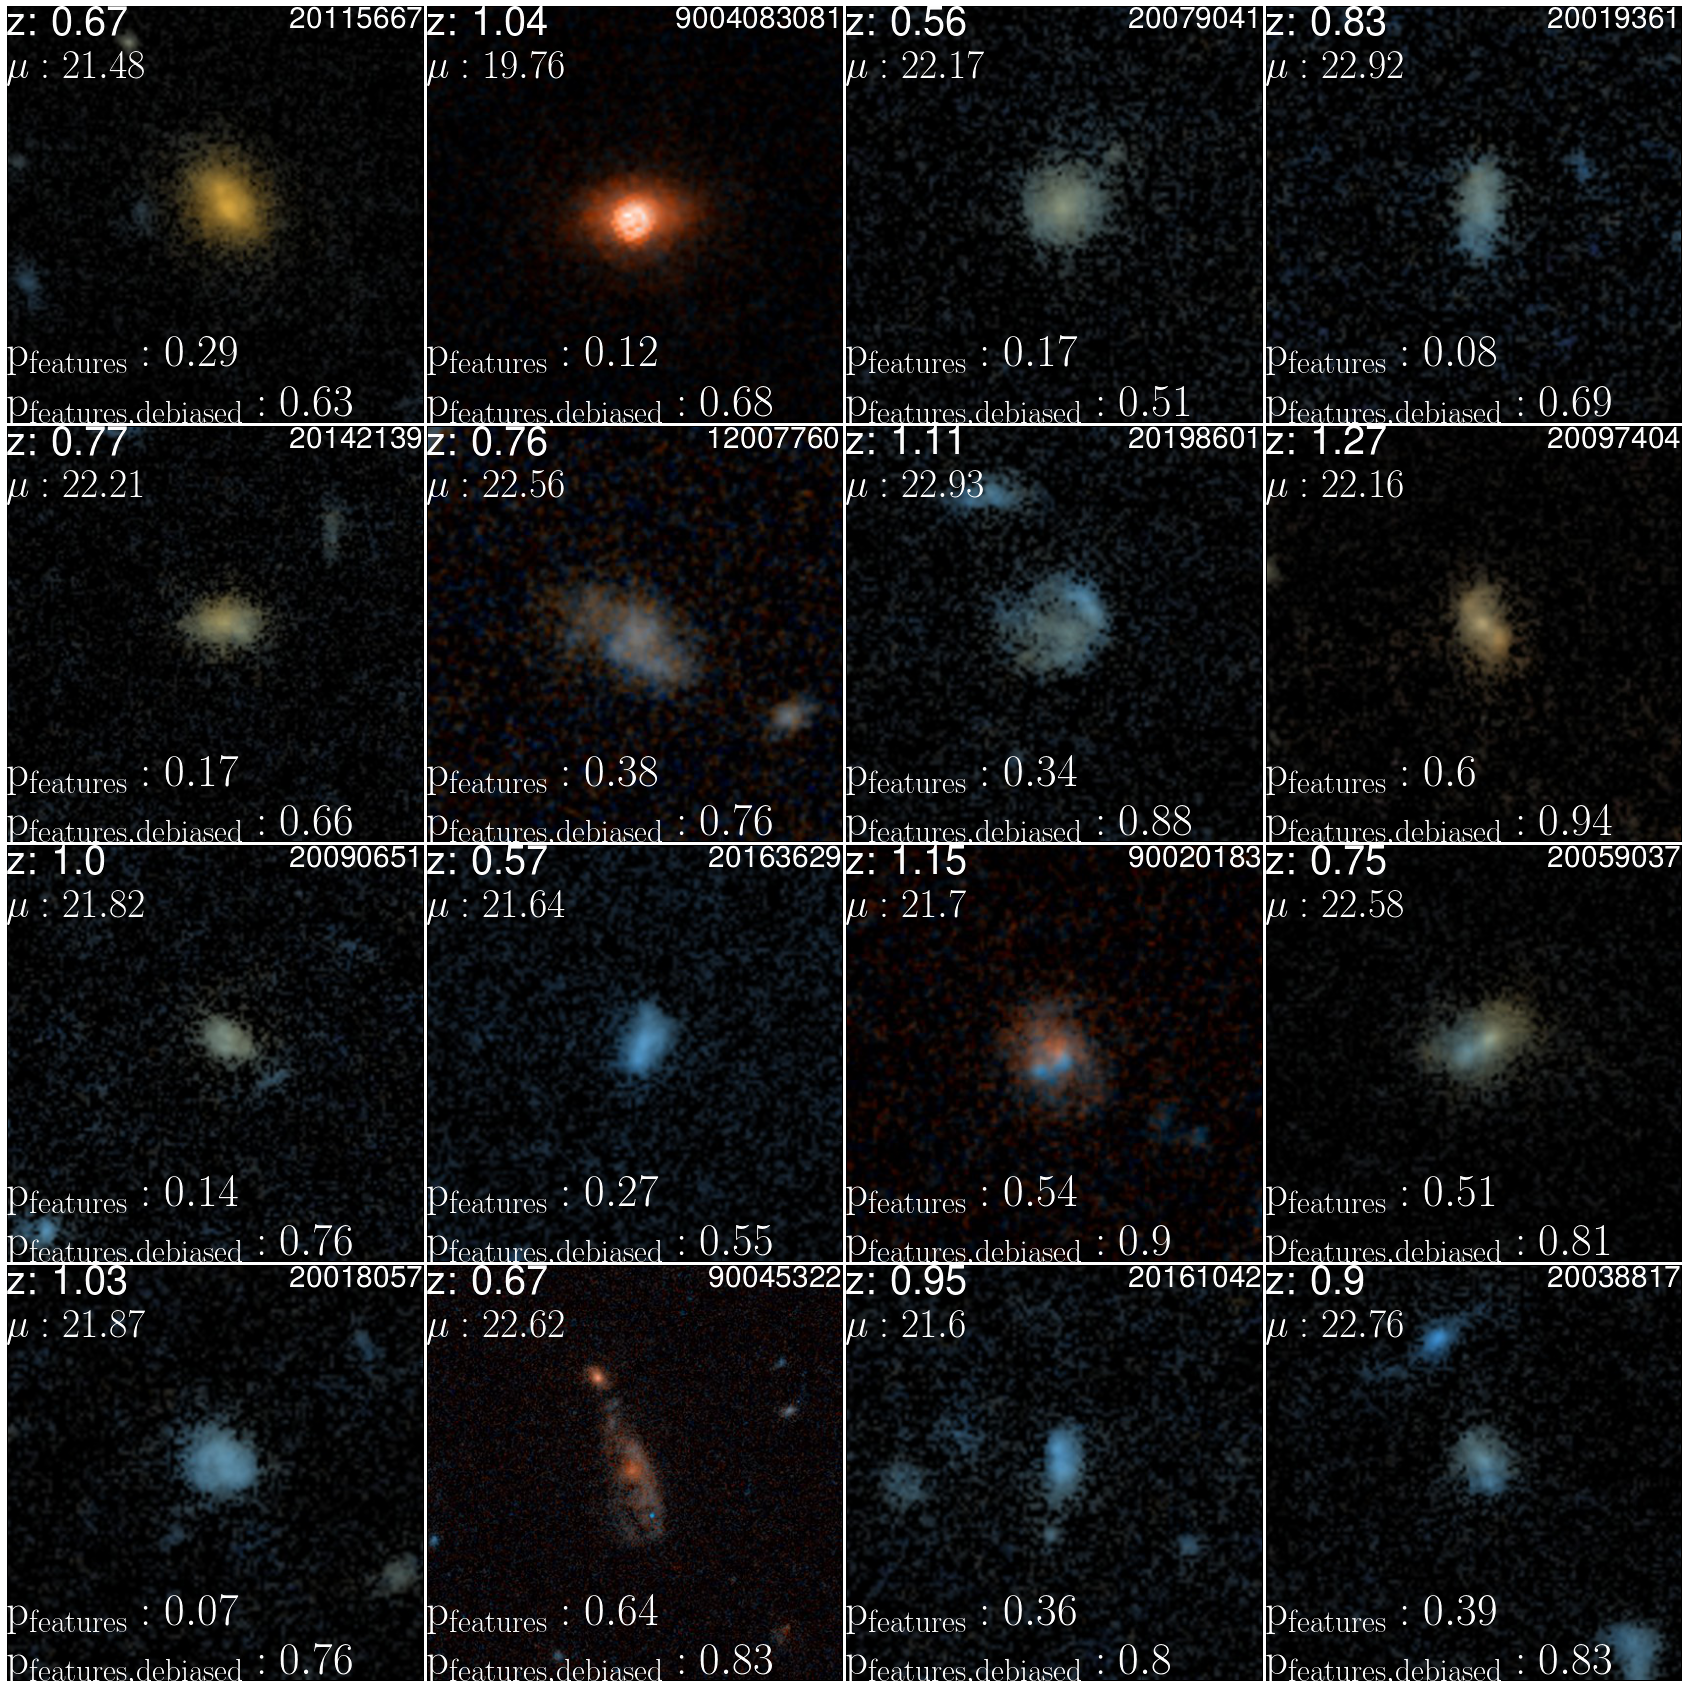

In [6]:
# Clumpy galaxies

gs=gridspec.GridSpec(4,4)
gs.update(wspace=0.01)
gs.update(hspace=0.01)

#define upper and lower limits of z, mu, and p_features to look at:
zl = 0.5
zh = 4.0
mul = 17
muh = 23
 
#get list of galaxies within certain ranges of z, mu and p_features 
data_inds = (data['Z']>=zl) & (data['Z'] < zh) &  (data['MU_HI']>=mul) & (data['MU_HI'] < muh) & (data['t01_smooth_or_features_a02_features_or_disk_debiased_fraction'] >=0.5) & (data['t12_clumpy_a01_yes_weighted_fraction'] >= 0.5)

these_data = data[data_inds]

# check to see if files are present

for gal in these_data:
    if not os.path.exists('/Volumes/REISEPASS/gzh/jpg/{0}.jpg'.format(gal['OBJNO_1'])):
        these_data = these_data[these_data['OBJNO_1'] != gal['OBJNO_1']]
        
if len(these_data) < 20:
    print 'try new values - only {0} images'.format(len(these_data))
else:
    print len(these_data)

#shuffle which galaxies get displayed     
n_list=np.linspace(0,len(these_data)-1,len(these_data))
shuffle(n_list)


f=plt.figure(figsize=(30,30))
n=0
for i in range (0,4):
    for j in range(0,4):
        ax=plt.subplot(gs[i,j])
        #while 'h' not in these_data[int(n_list[n])]['OBJNO_1']:
        gal = these_data[int(n_list[n])] # random galaxy from big list
        plt.imshow(get_image_from_file(gal['OBJNO_1']))
        plt.tick_params(labelbottom='off',labelleft='off')
        ax.annotate('z: %s\n$\mu: %s$'%(round(gal['Z'],2),round(gal['MU_HI'],2)),fontsize=40,xy=(0,1),
            xycoords='axes fraction',verticalalignment='top',color='white')
        ax.annotate('%s'%gal['OBJNO_1'],fontsize=30,xy=(1,1),
            xycoords='axes fraction',verticalalignment='top',horizontalalignment='right',color='white')
        ax.annotate('$\mathrm{p_{features}: %s}$\n$\mathrm{p_{features,debiased}: %s}$'%(round(gal['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'],2),round(gal['t01_smooth_or_features_a02_features_or_disk_debiased_fraction'],2)),fontsize=45,xy=(0,0),
            xycoords='axes fraction',color='white')
        n+=1
        
plt.savefig('/Users/willettk/Astronomy/meetings/florida2016/images_clumpy.pdf')
#f.text(.5,.92,'$%s < z < %s$\n$%s > \mu < %s$\n$%s > p_{features} < %s$'%(zl,zh,mul,muh,pl,ph), fontsize=40,ha='center');